In [2]:
import mysql.connector
import csv
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Connect to the database
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="",
    database="projetoengenhariadados"
)


# Create a cursor
cursor = conn.cursor()


with open('fase1-AllData.csv', mode='w', newline='', encoding='utf-8') as f:
     # Execute a SQL query
    cursor.execute(
        "SELECT * FROM aluno order by nr_aluno;")

    # Fetch the results
    rows = cursor.fetchall()

    writer = csv.writer(f)
    writer.writerow([i[0] for i in cursor.description])  # Escreve os nomes das colunas
    writer.writerows(rows)  # Escreve os dados



with open('fase1-InvalidData.txt',mode='wb') as f:
    # Execute a SQL query
    cursor.execute(
        "SELECT * from aluno where curso is null or curso NOT IN ('Informática', 'Psicologia', 'Comunicação') or media_entrada is null or media_entrada < 0 or media_entrada > 20 or media_entrada is null or media_final < 0 or media_final > 20 or (curso_concluido = 1 and media_entrada < 10) or (curso_concluido = 0 and media_entrada is not null) or (curso_concluido =1 and media_final < 10) or apelido is null;")

    # Fetch the results
    rows = cursor.fetchall()


    for row in rows:
        f.write(f"{row} \n".encode('utf-8'))

with open('fase1-ValidData.csv', mode='w', newline='', encoding='utf-8') as f:
     # Execute a SQL query
    cursor.execute(
         "SELECT * from aluno where not( curso is null or curso NOT IN ('Informática', 'Psicologia', 'Comunicação') or media_entrada is null or media_entrada < 0 or media_entrada > 20 or media_entrada is null or media_final < 0 or media_final > 20 or (curso_concluido = 1 and media_entrada < 10) or (curso_concluido = 0 and media_entrada is not null) or (curso_concluido =1 and media_final < 10) or apelido is null);")

    # Fetch the results
    rows = cursor.fetchall()

    writer = csv.writer(f)
    writer.writerow([i[0] for i in cursor.description])  # Escreve os nomes das colunas
    writer.writerows(rows)  # Escreve os dados

# Close the cursor and connection
cursor.close()
conn.close()


In [4]:
df = pd.read_csv('fase1-ValidData.csv')

In [5]:
# Funcao que imprime quantas linhas uma coluna tem preenchida com valores nao Nan
def imprimir_quantidade_linhas_com_valores(coluna):
    # Quantidade de linhas com valores na coluna
    quantidade_valor = df[coluna].count()
    # Imprimir a quantidade de valores não NaN da coluna
    print(f'Existem {quantidade_valor} linhas com valores nao NaN de {len(df[coluna])} linhas na coluna {coluna}.')


# Funcao que imprime o top 5 e o bottom 5 da coluna
def imprimir_top(coluna):
    dicionario = df[coluna].value_counts().to_dict()
    # Ordenar o dicionario para obter os valores mais usados
    lista = sorted(dicionario.items(), key=lambda x: x[1], reverse=True)
    
    # Imprimir o item mais usado
    print(f'{coluna} com mais aparições é: {lista[0][0]}, {lista[0][1]}.')
    print(f"O top 5 {coluna}:")
    df_top = pd.DataFrame(lista[:5], columns=[coluna, 'Number'])
    print(f'{df_top}\n')
    # Imprimir o top 5 menos usados
    if len(lista) > 5:
        print(f"\nO bottom 5 {coluna}:")
        df_bottom = pd.DataFrame(sorted(lista, key=lambda x: x[1])[:5], columns=[coluna, 'Number'])
        print(f'{df_bottom}\n')

# Funcao que imprime os valores unicos da coluna
def imprimir_valores_unicos(coluna):
    # Ordena os valores unicos 
    valores_unicos = sorted(df[coluna].unique())
    # Imprime os valores unicos da coluna
    print(f'Os valores da coluna {coluna} são: {", ".join(map(str, valores_unicos))}.\n')

In [6]:
for col in df.columns:
    imprimir_quantidade_linhas_com_valores(col)
    if(col not in 'nr_aluno'):
        imprimir_valores_unicos(col)
        imprimir_top(col)

Existem 1732 linhas com valores nao NaN de 1732 linhas na coluna nr_aluno.
Existem 1732 linhas com valores nao NaN de 1732 linhas na coluna nome.
Os valores da coluna nome são: Alice, Ana, Anakin Skywalker, Anne, Avelino, Beatriz, Bruno, Carla, Catarina, Christos, Diana, Joana, Jorge, Leonardo, Lucas, Luke, Maria, Maria João, Marta, Michaelangelo, Miguel, Nuno, Olivia, Patrícia, Pedro, Raquel, Rita, Rodrigo, Rui, Sandra, Thomas Anderson.

nome com mais aparições é: Rita, 114.
O top 5 nome:
      nome  Number
0     Rita     114
1  Rodrigo      79
2  Avelino      78
3    Jorge      76
4    Pedro      75


O bottom 5 nome:
               nome  Number
0   Thomas Anderson       1
1              Luke       1
2  Anakin Skywalker       1
3           Beatriz      38
4             Diana      43

Existem 1732 linhas com valores nao NaN de 1732 linhas na coluna apelido.
Os valores da coluna apelido são: (Lord Vader), (Neo), Capicua, Castelo, Castelo-Branco, Cintra, Laranjeira, Machado, Morais, Per

In [7]:
df['media_entrada'].corr(df['media_final'])

-0.8801223419637589

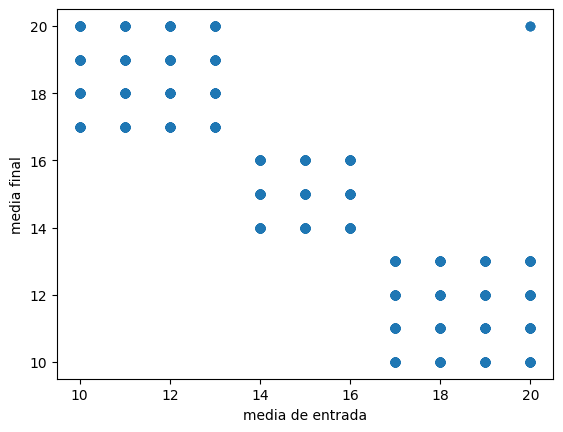

In [8]:
x= df['media_entrada']
y = df['media_final']
correlation =x.corr(y)
# plotting the data
plt.scatter(x, y)
 
# This will fit the best line into the graph
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

# Labelling axes
plt.xlabel('media de entrada')
plt.ylabel('media final')

plt.show()

In [9]:
df[(df['media_final'] > 18) & (df['media_entrada'] > 18) ]

,nr_aluno,nome,apelido,curso,media_entrada,curso_concluido,media_final
920,2210000,Thomas Anderson,(Neo),Informática,20,1,20.0
921,2210100,Luke,Skywalker,Comunicação,20,1,20.0
922,2290110,Anakin Skywalker,(Lord Vader),Psicologia,20,1,20.0


# Dificuldades
 - Descobrir o tipo para a bd  (como não sabia os dados que vinham coloquei dos que vi e tinha que colocar null tambem
 - Descobrir os dados invalidos/estranhos tive que fazer varias queries para descobrir
 - Usar/fazer conexão com o jupyter notebook com a bd

# Problemas Encontrados

Comecei por ver valores a null que assim de primeira analise não deveria haver, mas com a familiarização dos dados percebi que caso não tenham acabado o curso não podem ter dados então teria de ver os restantes
 - select * from aluno where nr_aluno is null or nome is null or apelido is null or curso is null or media_entrada is null or curso_concluido is null

(Foi nesta query que consegui confirmar que conseguia colocar o nr_aluno como pk para que a bd ficasse bem estruturada e para ter 100% a certeza que não existia repetidos fiz SELECT nr_aluno FROM aluno GROUP BY nr_aluno HAVING COUNT(*) > 1; que conta quantos são iguais e mostra caso tenha mais que 1)

Após descobrir alguns nulls teria tambem de ver a ultima coluna (media_final) então só poderia ser null caso não tivesse terminado o curso
  - select * from aluno where curso_concluido = 1 and media_final is null

E vendo se existe algum aluno com media final mas que nao tenha acabado o curso
   - select * from aluno where curso_concluido = 0 and media_final is not null
 
Depois de ver a falta de valores fui ver os valores que estavam "não nulls" então usei o distinct para ver valores unicos
  - select distinct nome from aluno
   - select distinct apelido from aluno
   - select distinct curso from aluno
   - select distinct media_entrada from aluno
   - select distinct curso_concluido from aluno
   - select distinct media_final from aluno
     
Nestas queries descobri vários valores estranhos como apelidos com () (após falado com o professor são válidos), cursos com nomes diferentes ao do "email", medias de entrada e saida fora do intervalo 0 a 20

Após descobrir todos estes erros nos dados fiz uma query que só aparecia os dados inválidos

 - SELECT * FROM aluno WHERE (curso is Null or curso NOT IN ('Informática', 'Psicologia', 'Comunicação')) OR (apelido is null or apelido LIKE '(%)') OR (media_entrada IS NULL OR (media_entrada < 0 OR media_entrada > 20)) OR (curso_concluido = 1 AND (media_entrada < 10 OR media_final IS NULL OR (media_final < 10 OR media_final > 20))) order by nr_aluno;

Vai selecionar os alunos que não tenham curso de Informática, Psicologia e Comunicação (como dito no "email") ou null, que tenham parenteses ou null no apelido, com media entrada null ou fora do intervalo, com curso concluido mas media final null ou fora do intervalo (só passa quem tem mais de 10)  e no fim ordenar pelo numero de aluno

Depois fazer a negação para obter valores válidos 
 - SELECT * FROM aluno WHERE not( (curso is Null or curso NOT IN ('Informática', 'Psicologia', 'Comunicação')) OR (apelido is null or apelido LIKE '(%)') OR (media_entrada IS NULL OR (media_entrada < 0 OR media_entrada > 20)) OR (curso_concluido = 1 AND (media_entrada < 10 OR media_final IS NULL OR (media_final < 10 OR media_final > 20)))) order by nr_aluno;


# Resultado da EDA

Com os resultados da EDA conseguimos observar caso haja (que não deveria) nulls em algum campo - só existe na coluna media_final porque é válido.
Conseguimos tambem observar valores unicos de cada coluna (menos da coluna nr_aluno porque são todos unicos e como são muitos não quis mostrar para não criar ruido visual) 
E podemos observar o top 5 valores mais aparições e o top 5 menos aparições.

# Resposta 1ª pergunta

A correlação da média de entrada e da média final é negativa forte, isto quer dizer, quando maior for a média inicial menor vai ser a média final e, vice versa, claro que não acontece sempre pois não é uma correlação de -1 mas sim de aproximadamente -0,88. Confirmando a resposta, não havendo 100% dos dados em que se a média inicial elevada a final irá ser baixa ou vice versa, com a visualização de um scatterplot observamos 2 pontos separados dos demais, então, fazendo brutamente a pesquisa de quais são e observamos que os alunos com número de aluno 2210000, 2210100 e 2290110 têm uma nota de entrada  alta e igual a nota final, e o aluno com número de aluno 2003594 teve 0 como nota de entrada e 15 como nota final, neste caso, acontece que uma diminui e outra aumenta mas não é proporcional.